In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

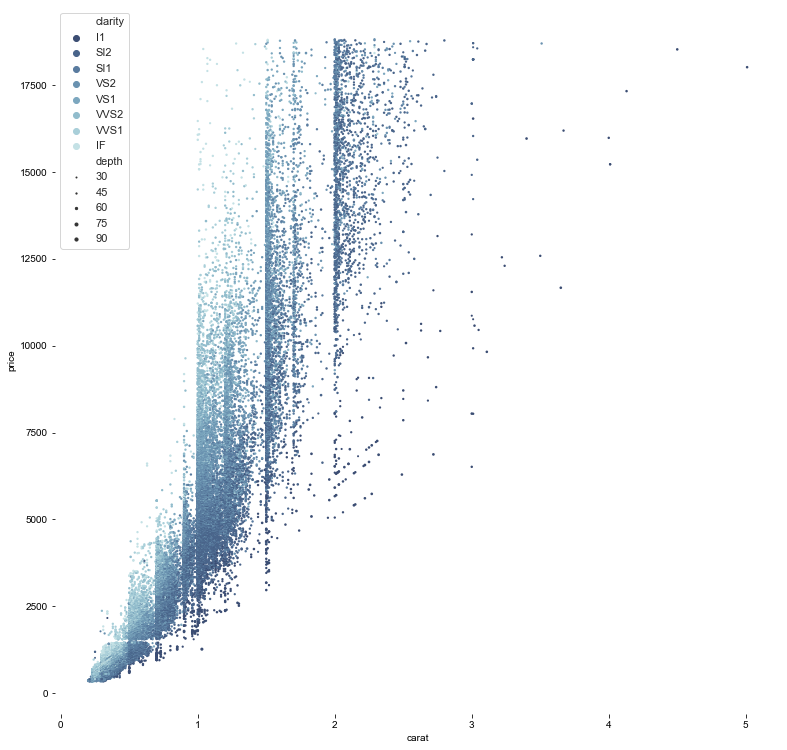

In [3]:
fig, ax = plt.subplots(figsize=(13, 13))
palette="ch:r=-.2,d=.3_r"
sns.set()

clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

#code here
sns.set_style("white")
with sns.axes_style('white'):
    sns.despine(left=True, bottom=True)
    ax = sns.scatterplot('carat',
                         'price',
                         data=df,
                         hue='clarity',
                         size='depth',
                         palette=palette,
                         sizes=(1,10),
                         linewidth=0,
                         hue_order=clarity_order
                        )

plt.show()

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


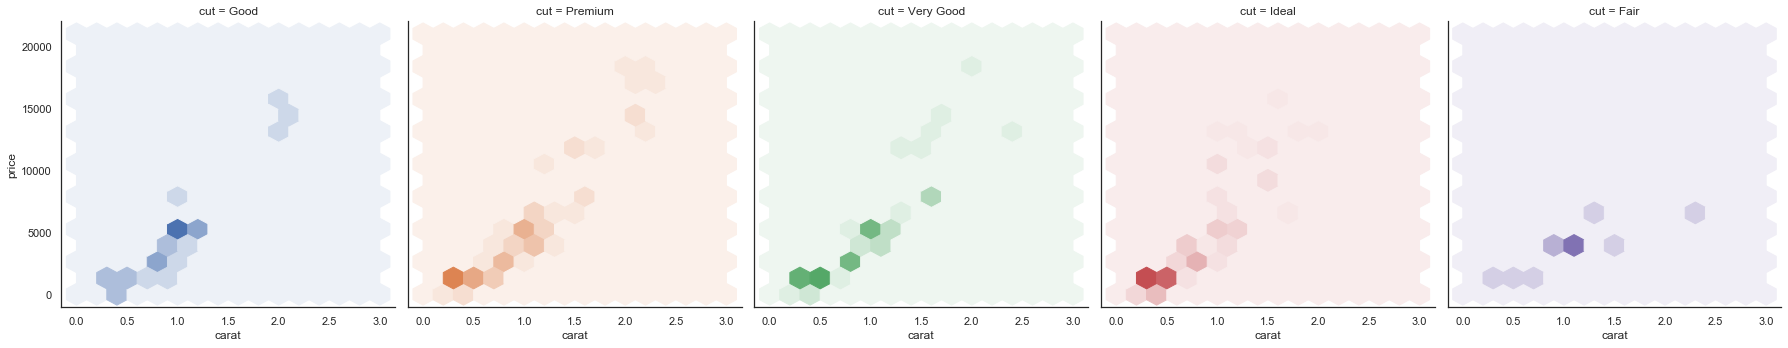

In [115]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    
with sns.axes_style():
    g = sns.FacetGrid(df, hue='cut', col='cut', height=5, margin_titles=True)
    g.map(hexbin, 'carat', 'price', extent= [0,3.0,0,21000], yscale=(0,20000))

Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

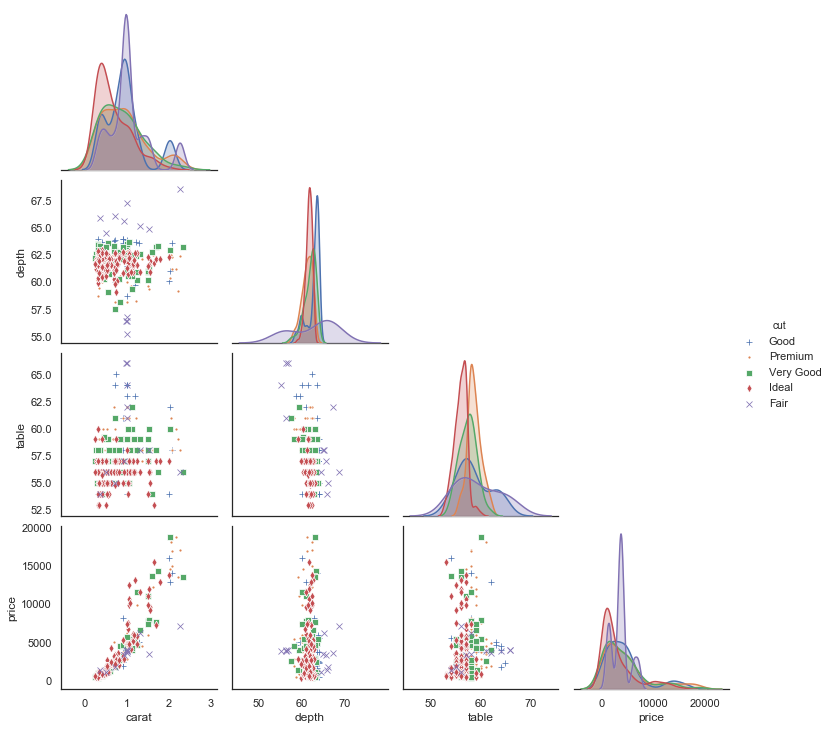

In [57]:
df = df.sample(n=300, random_state=123)
xy = ['carat', 'depth', 'table', 'price']
marks = ['+', '.', 's', 'd', 'x']

#code here
sns.pairplot(df,
             hue='cut',
             x_vars=xy,
             y_vars=xy,
             corner=True,
             markers=marks
            )

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

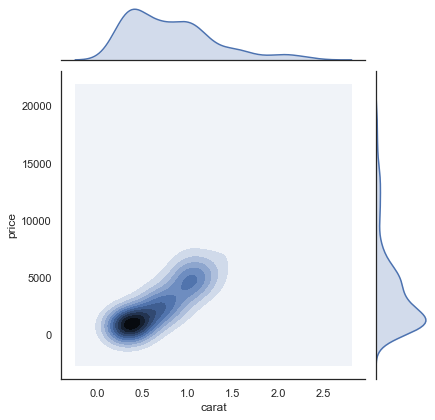

In [27]:
#code here
with sns.axes_style('white'):
    sns.jointplot('carat', 'price', data=df, kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 864x504 with 0 Axes>

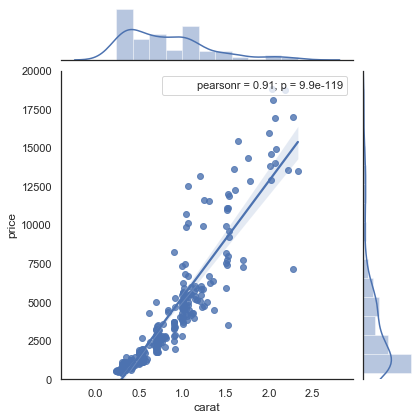

In [101]:
from scipy import stats

plt.figure(figsize=(12,7))

with sns.axes_style('white'):
    sns.jointplot('carat',
                  'price',
                  data=df,
                  kind='reg',
                  ylim=(0,20000)
                 ).annotate(stats.pearsonr,
                            loc='upper right')

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)